In [2]:
import numpy as np
from methods import grad_desc, coord_desc, proj_desc, proj_ball_desc, heavy_ball, back_descent
from plotting import plot_it, plot_convergence
import matplotlib.pyplot as plt
%matplotlib inline
%precision 4

'%.4f'

In [3]:
np.random.seed(104)
n = 5
m = 2
A = np.random.rand(n, m)
b = [3,3]
Q = A.T.dot(A)
f = lambda x: (0.5 * Q.dot(x) + b).dot(x)
grad = lambda x: Q.dot(x) + b
x_star = -np.linalg.inv(Q).dot(b)

(-12.7891, 7.2109, -9.9186, 10.0814)

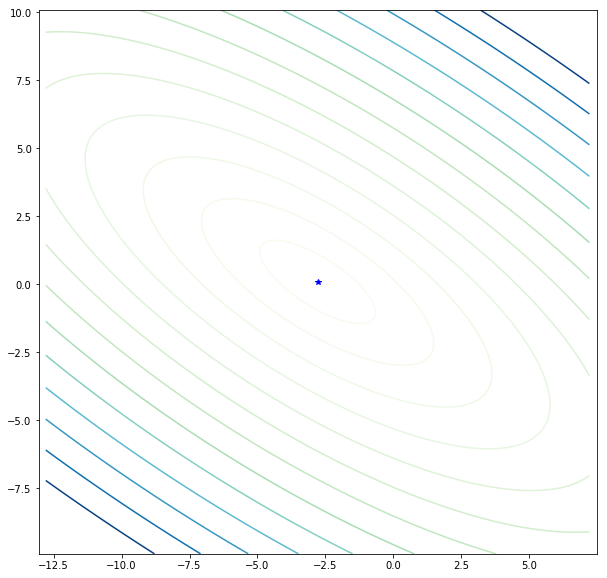

In [4]:
plot_it(f, x_star);
plt.axis('equal')

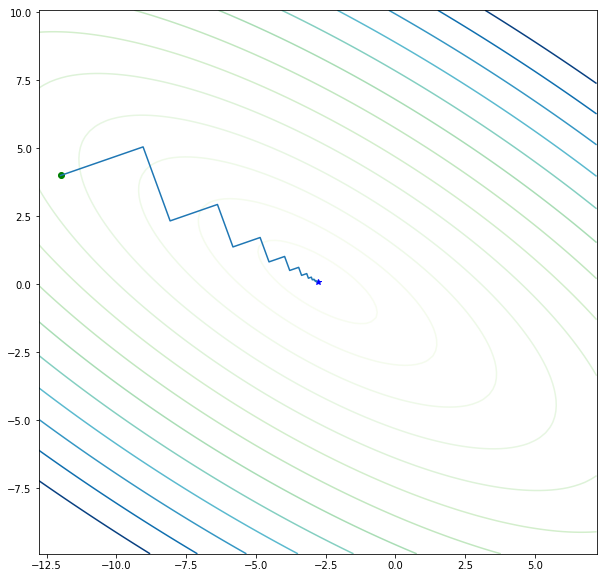

In [5]:
x_0 = [-12, 4]
xs, fs = grad_desc(x_0, f, grad, Q,b, iters=20)
p = plot_it(f, x_star, x_0, xs);

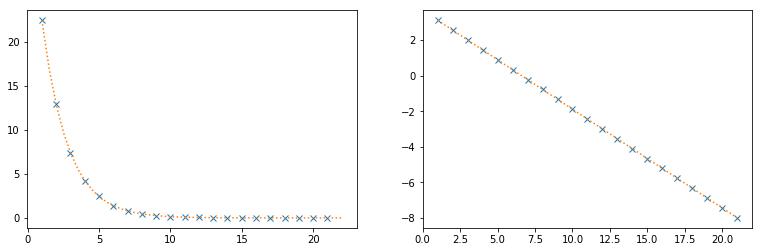

In [6]:
plot_convergence(fs, f(x_star));

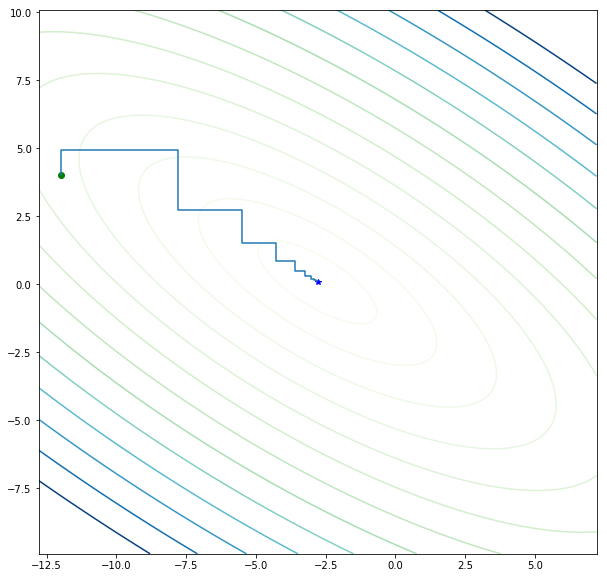

In [7]:
xs, fs = coord_desc(x_0, f, grad, Q,  iters=20)
p = plot_it(f, x_star, x_0, xs);

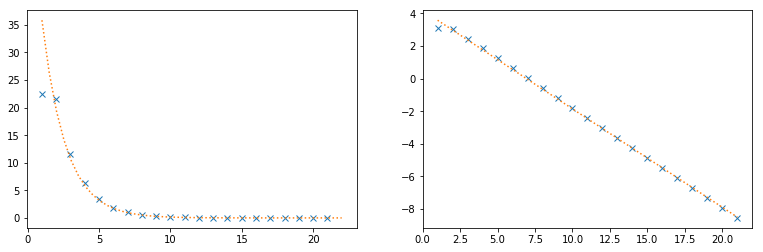

In [8]:
plot_convergence(fs, f(x_star));

In [9]:
y_min, y_max = p.gca().get_ylim()
x_min, x_max = p.gca().get_xlim()
line = [[x_min, x_max],
        [y_min + abs(y_max - y_min) * 0.4, y_min + abs(y_max - y_min) * 0.33]]

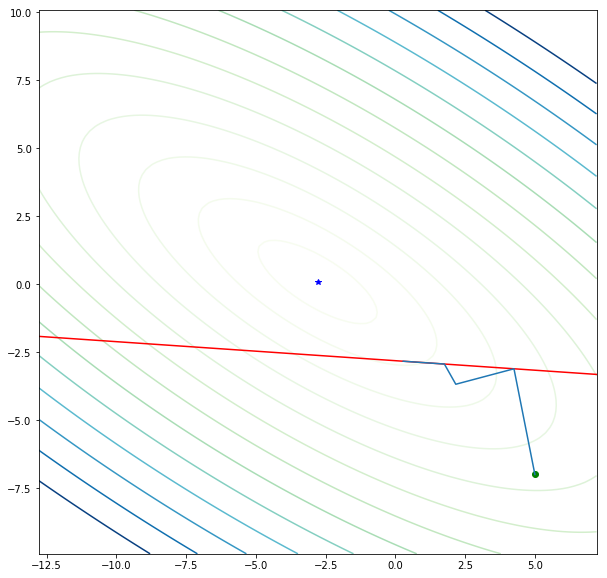

In [10]:
x_0 = [5, -7]
xs, fs = proj_desc(x_0, f, grad,line,  iters=20)
p = plot_it(f, x_star, x_0, xs, bound_line=line)
# plt.axis('equal')

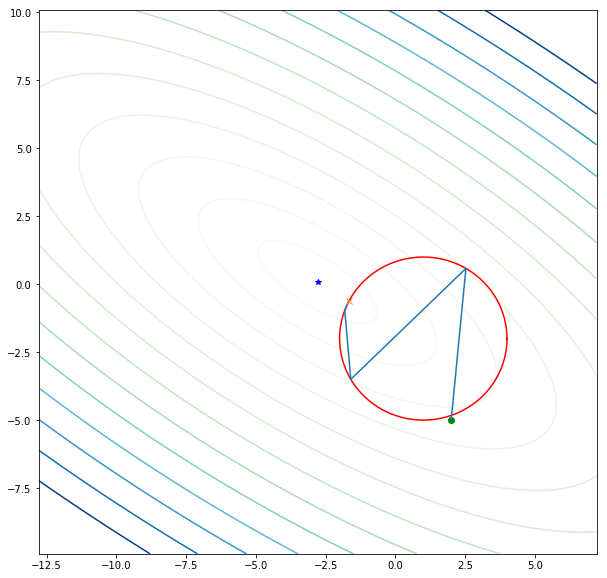

In [11]:
a = np.linspace(0, 2*np.pi, 100)
r = 3
center = [1,-2]
x1 = r * np.cos(a) + center[0]
x2 = r * np.sin(a) + center[1]
x_0 = [2, -5]
xs, ys = proj_ball_desc(x_0, f, grad, center, r)
p = plot_it(f, x_star, x_0=x_0, bound_line=[x1, x2], search_line=xs);
plt.plot(*xs[-1], 'x')

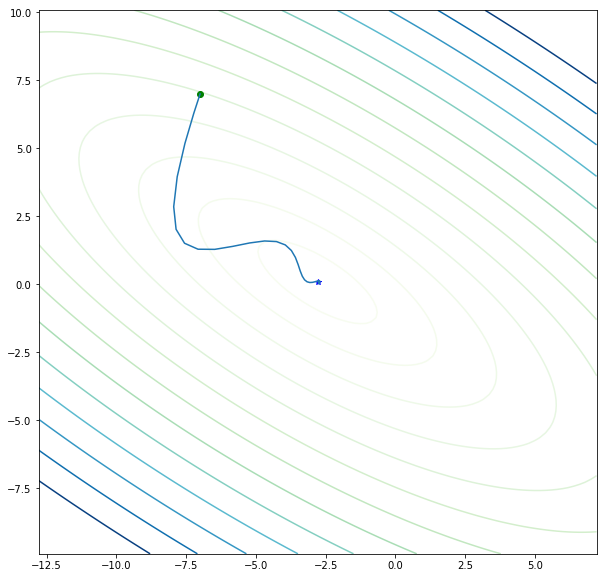

In [12]:
x_0 = [-7, 7]
xs, fs = heavy_ball(x_0, f, grad, iters=40, alpha=0.07, beta=0.75)
p = plot_it(f, x_star, x_0, xs);

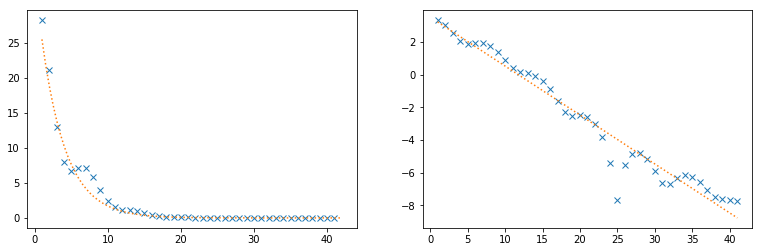

In [33]:
plot_convergence(fs, f(x_star));

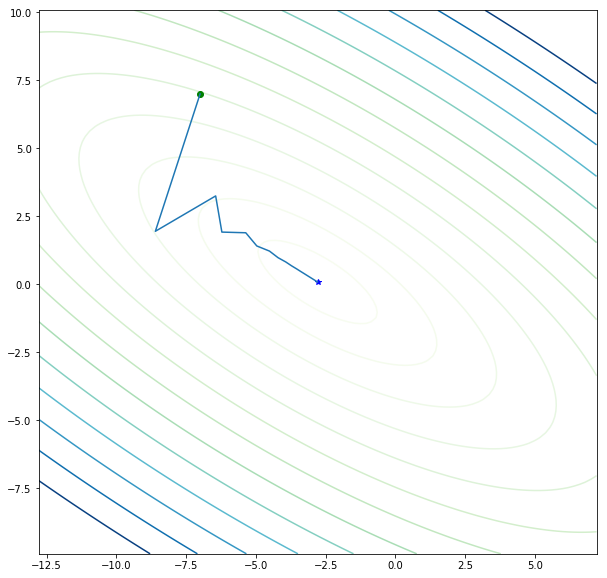

In [14]:
x_0 = [-7, 7]
xs, fs = back_descent(x_0, f, grad, iters=40)
p = plot_it(f, x_star, x_0, xs);

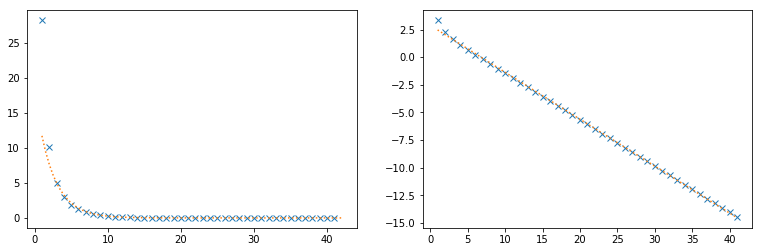

In [15]:
plot_convergence(fs, f(x_star));